In [1]:
import json

In [2]:
from glob import glob
jsons = (json.load(open(f)) 
         for f in glob('mutationParameters/*.json'))
def get_mutation_params(j):
    params = j['metadata']['parameters']
    return (params['fprMutationRate'], params['fprMutationMagnitude'], j['metadata']['policy'])
jdict = {get_mutation_params(j): np.array(j['falsePositiveRate']).mean(axis=0) for j in jsons}

In [3]:
jdict.keys()

dict_keys([(0.95, 0.01, 'PUBLICATIONS'), (0.01, 0.05, 'PUBLICATIONS'), (0.95, 0.05, 'PUBLICATIONS'), (0.95, 0.05, 'RANDOM'), (0.25, 0.01, 'RANDOM'), (0.25, 0.05, 'PUBLICATIONS'), (0.25, 0.01, 'PUBLICATIONS'), (0.01, 0.01, 'PUBLICATIONS'), (0.01, 0.01, 'RANDOM'), (0.25, 0.05, 'RANDOM'), (0.95, 0.01, 'RANDOM'), (0.01, 0.05, 'RANDOM')])

In [4]:
plot_order = [(k[0], k[1]) for k in jdict.keys()]
print(plot_order[0][0])
print(type(plot_order[0][0]))
plot_order.sort(key=lambda x: x[1])
plot_order.sort(key=lambda x: x[0])
plot_order = np.array(plot_order)
print(plot_order)

0.95
<class 'float'>
[[0.01 0.01]
 [0.01 0.01]
 [0.01 0.05]
 [0.01 0.05]
 [0.25 0.01]
 [0.25 0.01]
 [0.25 0.05]
 [0.25 0.05]
 [0.95 0.01]
 [0.95 0.01]
 [0.95 0.05]
 [0.95 0.05]]


In [5]:
rates = np.unique(plot_order[:, 0])
magnitudes = np.unique(plot_order[:, 1])
print(rates.dtype)
print(magnitudes)

float64
[0.01 0.05]


In [6]:
400000. % 2e5


0.0

[-200000.0, 0.0, 200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0]
8
[-200000.0, 0.0, 200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0]
8


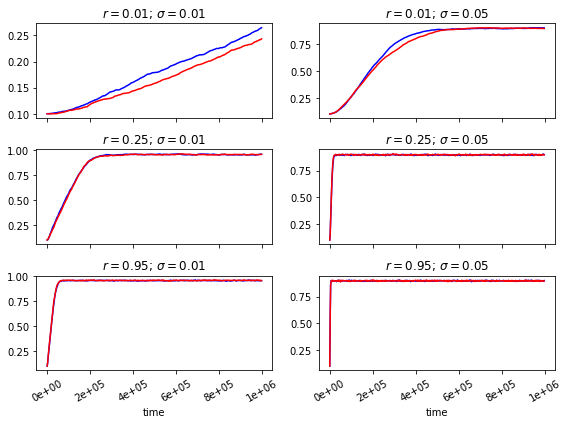

In [7]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))

for rate_idx, rate in enumerate(rates):
    for mag_idx, mag in enumerate(magnitudes):
        
        random_fpr = jdict[(rate, mag, 'RANDOM')]
        publications_fpr = jdict[(rate, mag, 'PUBLICATIONS')]

        x = np.arange(0, 1e6, 2000)
        
        ax = axes[rate_idx, mag_idx]
        ax.plot(x, random_fpr, color='blue')
        ax.plot(x, publications_fpr, color='red')
        
        if rate_idx == 2:

            ax.set_xlabel('time')
            ax.set_xticklabels(
                ['{:1.0e}'.format(el) for el in ax.get_xticks()],
                rotation=30
            )
        else:
            ax.set_xticklabels('' for el in ax.get_xticks())
        
        ax.set_title(r"$r={}$; $\sigma={}$".format(rate, mag))

plt.savefig('test.pdf')

{'baseRate': 0.1,
 'parameters': {'awardAmount': 50,
  'baseRate': 0.1,
  'fprMutationMagnitude': 0.01,
  'fprMutationRate': 0.25,
  'nIterations': 1000000,
  'nTrials': 3},
 'policy': 'PUBLICATIONS',
 'syncEvery': 2000}

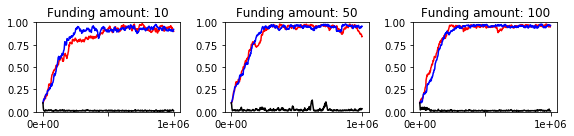

In [33]:
from vis import plot_award_experiment

jsons, fpr_dict = plot_award_experiment(experiment_dir='awardAmounts')
jsons[0]['metadata']

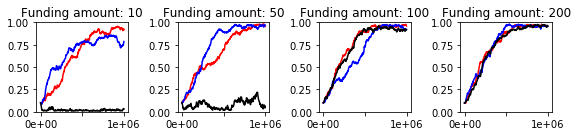

In [31]:
from vis import plot_award_experiment

plot_award_experiment(experiment_dir='awardAmounts?MuRate=0.1&initFPR=0.1/');

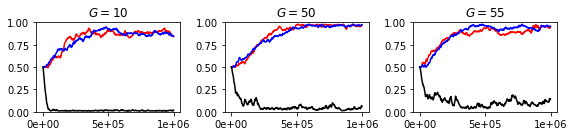

In [46]:
from vis import plot_award_experiment

plot_award_experiment(
    experiment_dir='awardAmounts?MuRate=0.1&initFPR=0.5',
low_funding=10, high_funding=55);

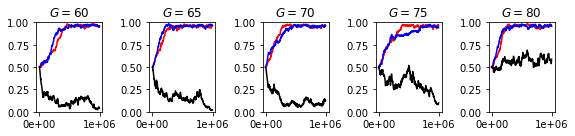

In [43]:
from vis import plot_award_experiment

plot_award_experiment(
    experiment_dir='awardAmounts?MuRate=0.1&initFPR=0.5',
low_funding=60, high_funding=80);

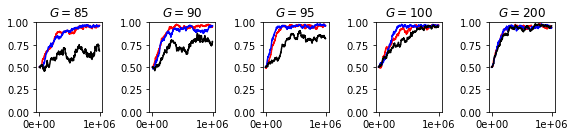

In [44]:
plot_award_experiment(
    experiment_dir='awardAmounts?MuRate=0.1&initFPR=0.5',
low_funding=85, high_funding=200);